# Introduction - Titanic Dataset
The Titanic Dataset provides information about the passengers onboard the RMS Titanic, which tragically sank on its maiden voyage in April 1912 after colliding with an iceberg. Here's a brief overview of the dataset:

**Attributes (Columns) Include**:

1. **PassengerId**: Unique identifier for each passenger.
2. **Survived**: A binary attribute indicating whether the passenger survived (1) or did not survive (0).
3. **Pclass**: Passenger class, an indicator of socio-economic status. It has three categories: 1st (Upper class), 2nd (Middle class), and 3rd (Lower class).
4. **Name**: Full name of the passenger.
5. **Sex**: Gender of the passenger (male or female).
6. **Age**: Age of the passenger
7. **SibSp**: Number of siblings or spouses aboard the Titanic.
8. **Parch**: Number of parents or children aboard the Titanic.
9. **Ticket**: Ticket number.
10. **Fare**: Passenger fare, indicating the amount they paid for the ticket.
11. **Cabin**: Cabin number where the passenger stayed
12. **Embarked**: Port of embarkation, indicating where the passenger boarded the ship. It has three categories: C (Cherbourg), Q (Queenstown), and S (Southampton).



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pgmpy.estimators import HillClimbSearch, BicScore, K2Score, MaximumLikelihoodEstimator, BayesianEstimator, ParameterEstimator
from pgmpy.models import BayesianModel
from sklearn.model_selection import train_test_split
from pgmpy.inference import VariableElimination
from sklearn.metrics import accuracy_score
import networkx as nx


In [2]:
#loading the dataset to be used 
df = pd.read_csv('titanic.csv')

# Exploratory Data Analysis
In this section we explore the dataset we have. The first thing is to check for missing data in the dataset and find the best way to the missing data. After this we visually explore the data using many graphs and illustrations so that we have a rough idea of what we are dealing with 

In [3]:
#Checking for missing data in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Missing Data
We see that we have 177 missing ages. From the dataset we calculate the average for the three different classes then we use these averages to populate the dataset for all missing values. The cabin has a lot of missing data thus we just delete the whole column. Embarked has just 2 missing values, so we randomly select from the column and we fill it in. PassangerId and Tickets do not provide any valuable insights so we delete them 

In [4]:
def impute_age_based_on_pclass(row):
    if pd.isnull(row['Age']):
        if row['Pclass'] == 1:
            return 45
        elif row['Pclass'] == 2:
            return 30  
        else:
            return 23
    else:
        return row['Age']

df['Age'] = df.apply(impute_age_based_on_pclass, axis=1)

av_fare = df['Fare'].mean()

df['Fare'].fillna(av_fare, inplace = True)

df['Embarked'].fillna('Q', inplace=True)

In [5]:
df = df.drop('Cabin', axis=1)
df = df.drop('Ticket', axis=1)
df = df.drop('PassengerId', axis=1)

In [6]:
df.isnull().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [7]:
#Statistical Analysis of the data
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.195477,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.548024,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Dataset Visual Insights**

These following section is for visuals. The visualization show how different variables interact together and how the target variable 'Survived' relates to everything else


<Axes: xlabel='Survived', ylabel='count'>

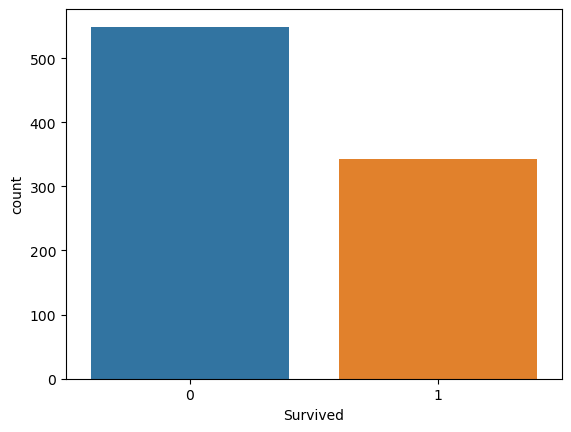

In [8]:
# Count of people who survived and those who couldnt make it
sns.countplot(x='Survived', data=df)


<Axes: xlabel='Survived', ylabel='count'>

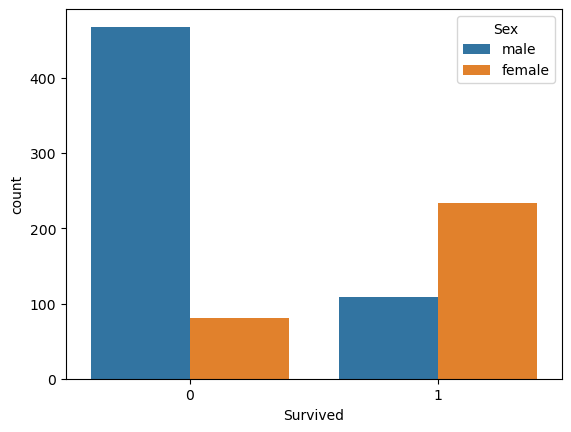

In [9]:
# Comparison of males and females who survived
sns.countplot(x='Survived', hue='Sex', data=df)

<Axes: xlabel='Age', ylabel='Count'>

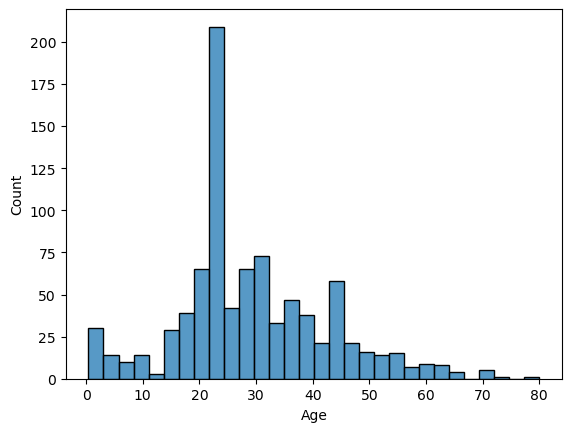

In [10]:
# The age distribution
sns.histplot(df['Age'].dropna(), bins=30)

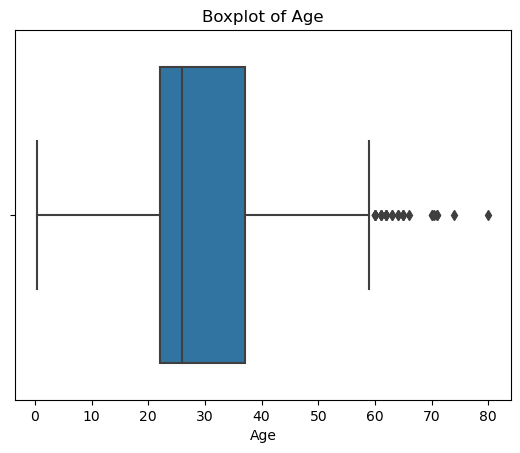

In [11]:
# Creating a boxplot for the 'Age' column
sns.boxplot(x=df['Age'])

# Displaying the plot
plt.title('Boxplot of Age')
plt.show()

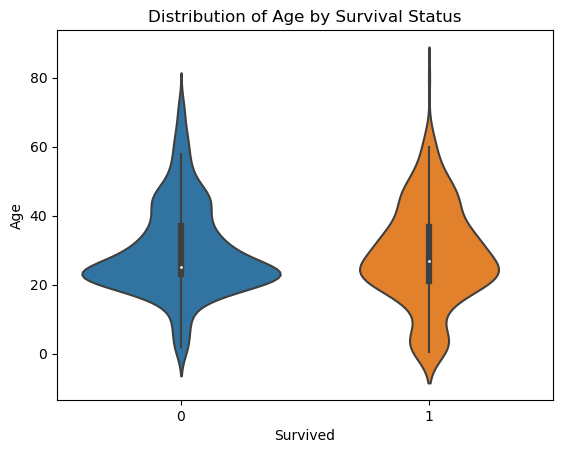

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Distribution of Age by Survival Status')
plt.show()


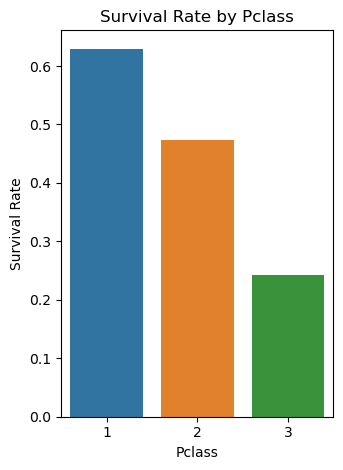

In [13]:
sex_survival_rate = df.groupby('Sex')['Survived'].mean()
pclass_survival_rate = df.groupby('Pclass')['Survived'].mean()


plt.subplot(1, 2, 2) 
sns.barplot(x=pclass_survival_rate.index, y=pclass_survival_rate.values)
plt.title('Survival Rate by Pclass')
plt.ylabel('Survival Rate')
plt.xlabel('Pclass')

plt.tight_layout()
plt.show()

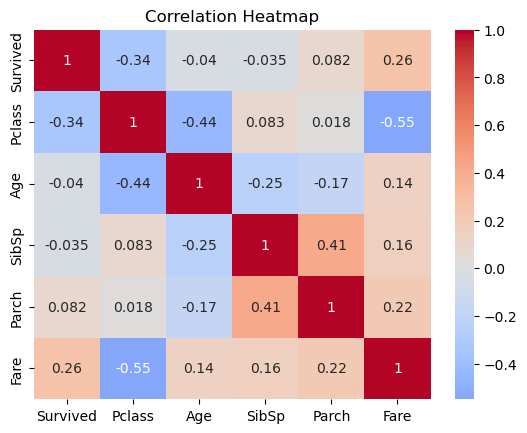

In [14]:
# The correlation matrix shows how strongly related variables are
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

#correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


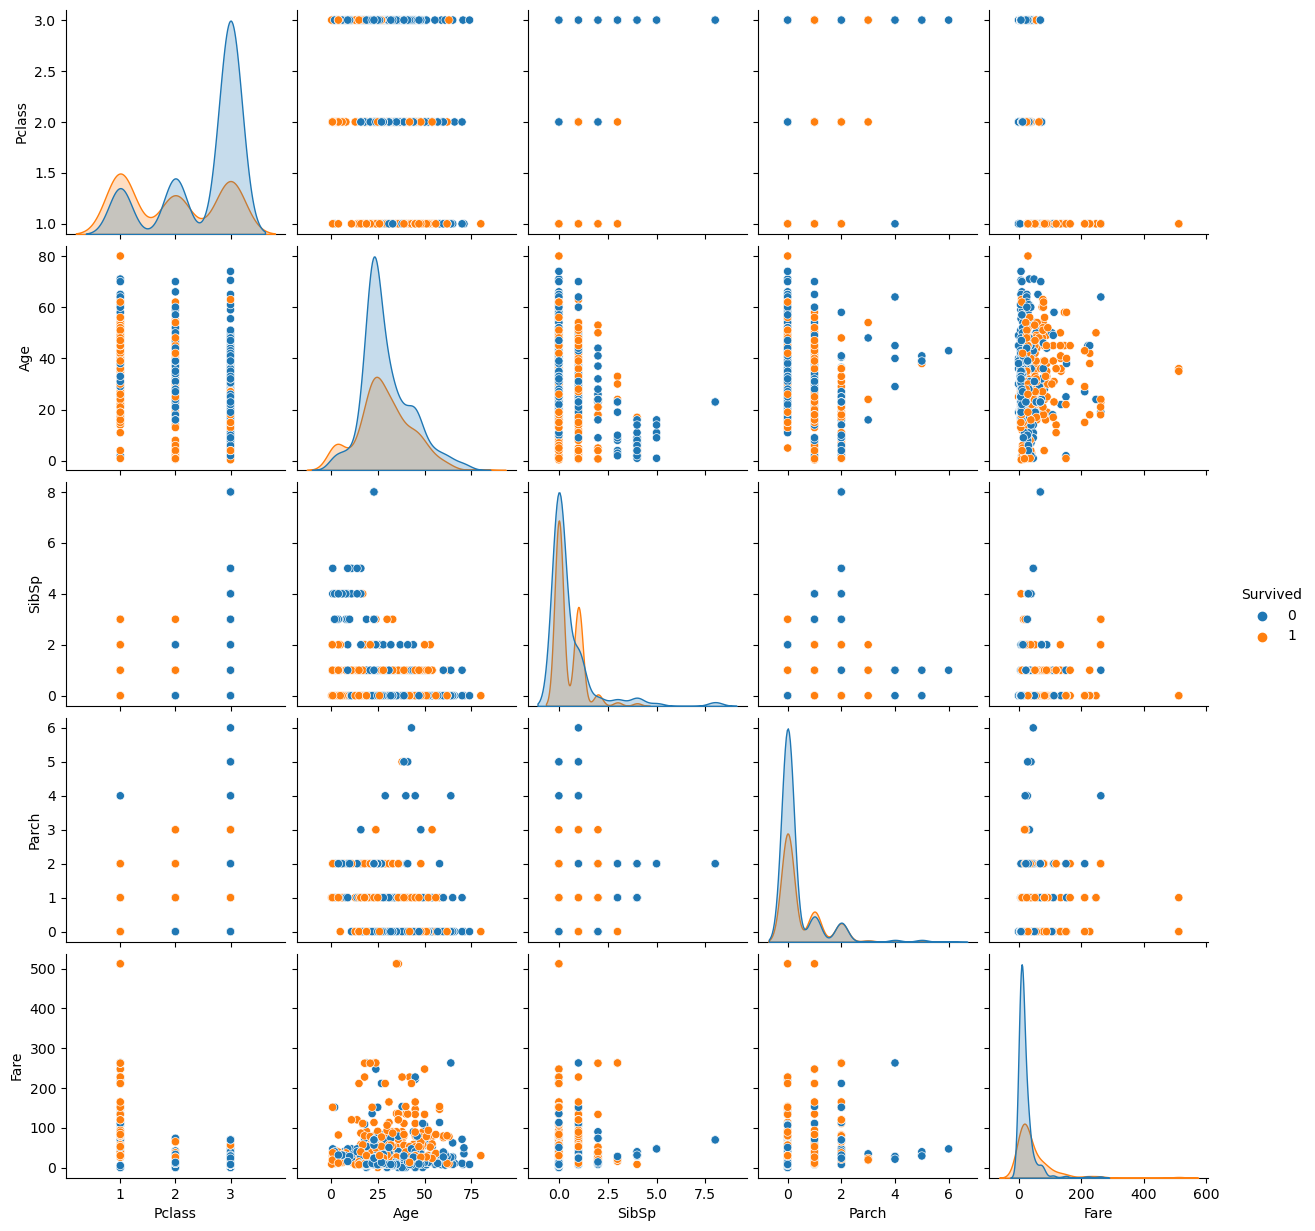

In [15]:
import seaborn as sns

# Use pairplot on the entire DataFrame
sns.pairplot(df, hue='Survived')
plt.show()


In [16]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


# Feature Engineering
We now have a visual interpretation of what's happeing in the dataset. One thing worth noting is that the dataset is very noisy especially on numerical variables like age, fare and number of siblings/parents. To resolve this, we categorize the dataset so that it can be compact:  

**Age**  
The age categorized into Child, Teenager and Adult. These categories were further one-hot encoded so that they can be easier to work with.   
**Fare**  
The Fare was categorized into Low, Medium, High, Luxury, the one-hot encoding was also extracted

**Family size** 
The fas was categorized into three bins i.e. Alone, Small Family and Large Family,one-hot encoding was also implemented.  

**Embarked**
This variable has 3 categories which hot-encoded to get ther numerical presentations.  

**Sex**  
The gender was also hot-encoded into 1 and 0

Another feature engineered is extracting a person's title from their name. The aim was to see if people who had certain titles affected their chances of survival. 

In [17]:

def categorize_age(age):
    if pd.isnull(age):
        return 'Unknown'
    elif age < 12:
        return 'Child'
    elif age < 20:
        return 'Teenager'
    else:
        return 'Adult'

df['Age Category'] = df['Age'].apply(categorize_age)

# Defining a mapping dictionary
age_category_mapping = {
    'Child': 0,
    'Teenager': 1,
    'Adult': 2,
}

# Using the mapping to convert categories to numbers
df['Age Encoded'] = df['Age Category'].map(age_category_mapping)

# Displaying the first few rows to see the encoded column
print(df[['Age', 'Age Category', 'Age Encoded']].head())


    Age Age Category  Age Encoded
0  22.0        Adult            2
1  38.0        Adult            2
2  26.0        Adult            2
3  35.0        Adult            2
4  35.0        Adult            2


In [18]:
# Extracting titles from the 'Name' column
def extract_title(name):
    titles = ["Mr.", "Mrs.", "Miss.", "Master.", "Dr.", "Rev.", "Col.", "Major.", "Mlle.", "Countess.", "Ms.", "Lady.", "Jonkheer.", "Don.", "Dona.", "Mme.", "Capt.", "Sir."]
    for title in titles:
        if title in name:
            return title[:-1]  # Remove the dot at the end
    return "Unknown"

df['Title'] = df['Name'].apply(extract_title)

#Displaying the first few rows to see the titles
print(df[['Name', 'Title']].head())

                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


In [19]:
def categorize_fare(fare):
    if fare <= 10:
        return 'Low'
    elif fare <= 50:
        return 'Medium'
    elif fare <= 100:
        return 'High'
    else:
        return 'Luxury'

df['Fare Category'] = df['Fare'].apply(categorize_fare)

# Defining a mapping dictionary for fares
fare_category_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Luxury': 3
}

# Using the mapping to convert fare categories to numbers
df['Fare Encoded'] = df['Fare Category'].map(fare_category_mapping)

# Displaying the first few rows to see the encoded column
print(df[['Fare', 'Fare Category', 'Fare Encoded']].head())


      Fare Fare Category  Fare Encoded
0   7.2500           Low             0
1  71.2833          High             2
2   7.9250           Low             0
3  53.1000          High             2
4   8.0500           Low             0


In [20]:
# Computing the FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 for the passenger themselves

# Categorizing FamilySize
def categorize_family_size(size):
    if size == 1:
        return 'Alone'
    elif size <= 3:
        return 'SmallFamily'
    else:
        return 'LargeFamily'

df['Family Category'] = df['FamilySize'].apply(categorize_family_size)

# Defining a mapping dictionary for family categories
family_category_mapping = {
    'Alone': 0,
    'SmallFamily': 1,
    'LargeFamily': 2
}

# Using the mapping to convert family categories to numbers
df['Family Encoded'] = df['Family Category'].map(family_category_mapping)

# Displaying the first few rows to see the encoded column
print(df[['SibSp', 'Parch', 'FamilySize', 'Family Category', 'Family Encoded']].head())


   SibSp  Parch  FamilySize Family Category  Family Encoded
0      1      0           2     SmallFamily               1
1      1      0           2     SmallFamily               1
2      0      0           1           Alone               0
3      1      0           2     SmallFamily               1
4      0      0           1           Alone               0


In [21]:
# Mapping of short codes to full port names
port_mapping = {
    "C": "Cherbourg",
    "Q": "Queenstown",
    "S": "Southampton"
}

# Applying the mapping to the 'Embarked' column
df['Embarked'] = df['Embarked'].map(port_mapping).fillna(df['Embarked'])

# Defining a mapping dictionary for the full port names
embarked_encoding = {
    'Cherbourg': 0,
    'Queenstown': 1,
    'Southampton': 2
}

# Using the mapping to convert the full port names to numbers
df['Embarked Encoded'] = df['Embarked'].map(embarked_encoding)

# Displaying the first few rows to see the encoded column
print(df[['Embarked', 'Embarked Encoded']].head())


      Embarked  Embarked Encoded
0  Southampton                 2
1    Cherbourg                 0
2  Southampton                 2
3  Southampton                 2
4  Southampton                 2


In [22]:
# Define a mapping dictionary for the 'Sex' column
sex_encoding = {
    'male': 0,
    'female': 1
}

# Using the mapping to convert the 'Sex' values to numbers
df['Sex Encoded'] = df['Sex'].map(sex_encoding)

# Displaying the first few rows to see the encoded column
print(df[['Survived','Sex', 'Sex Encoded']].head())


   Survived     Sex  Sex Encoded
0         0    male            0
1         1  female            1
2         1  female            1
3         1  female            1
4         0    male            0


In [23]:
# An overview of what the new updated dataset looks like
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age Category,Age Encoded,Title,Fare Category,Fare Encoded,FamilySize,Family Category,Family Encoded,Embarked Encoded,Sex Encoded
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Southampton,Adult,2,Mr,Low,0,2,SmallFamily,1,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Cherbourg,Adult,2,Mrs,High,2,2,SmallFamily,1,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Southampton,Adult,2,Miss,Low,0,1,Alone,0,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Southampton,Adult,2,Mrs,High,2,2,SmallFamily,1,2,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Southampton,Adult,2,Mr,Low,0,1,Alone,0,2,0


# **Correlation Matrix**
We create a new correlation matrix that we engineered from the features. Thise are the most important variables because they will be used for most of the analysis for the rest of this notebook.  We are trying to find out how this different variables affect each other, the independences. This information will be very pivotal when we are contructing the structure of the Bayesian Network

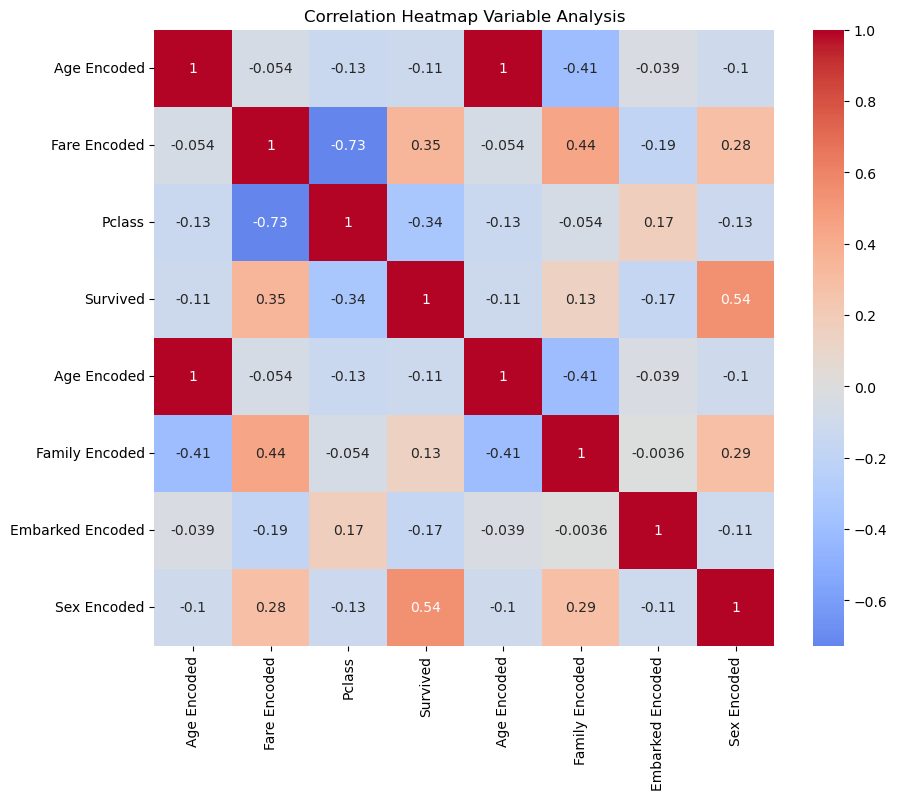

In [24]:
# Subset the data frame to include only the desired columns
selected_vars = ['Age Encoded', 
                 'Fare Encoded', 
                 'Pclass', 
                 'Survived', 
                 'Age Encoded',
                 'Family Encoded',
                 'Embarked Encoded',
                 'Sex Encoded']
subset_df = df[selected_vars]

# Calculate the correlation matrix for the subset
correlation_matrix = subset_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap Variable Analysis")
plt.show()



# **Bayesian Network Structure Learning with the HillClimbSearch Algorithm**


After carefully preprocessing the data, I identified the key variables essential for our analysis. The next big step is building the Bayesian Network. I used Constrained Based methods for structure learning, I initially experimented with the PC algorithm. However, due to unsatisfactory performance, I transitioned to the HillClimbSearch Algorithm.

The HillClimbSearch algorithm offers a systematic approach to learn the structure of a Bayesian Network. Through iterative refinement, this algorithm seeks the network structure that best fits our data. The inferred edges within this network shed light on the relationships and dependencies among our selected variables.

In [25]:
#Implementing the Hill Climb Search Algorithm

# Selecting the  relevant columns for learning
selected_columns = ['Survived', 'Pclass', 'Sex Encoded', 'Age Encoded', 'Family Encoded', 'Fare Encoded', 'Embarked Encoded']

# Filtering the dataset to include only selected columns
filtered_data = df[selected_columns]

# Defining the HillClimbSearch estimator and fitting the data
estimator = HillClimbSearch(filtered_data)

# Performing structure learning using the HillClimbSearch algorithm
best_model = estimator.estimate()

# Printing the learned edges in the Bayesian Network
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('Pclass', 'Survived'), ('Pclass', 'Embarked Encoded'), ('Pclass', 'Sex Encoded'), ('Sex Encoded', 'Survived'), ('Age Encoded', 'Family Encoded'), ('Age Encoded', 'Survived'), ('Age Encoded', 'Fare Encoded'), ('Age Encoded', 'Sex Encoded'), ('Family Encoded', 'Pclass'), ('Family Encoded', 'Sex Encoded'), ('Fare Encoded', 'Pclass'), ('Fare Encoded', 'Sex Encoded'), ('Fare Encoded', 'Family Encoded'), ('Embarked Encoded', 'Sex Encoded')]


In [26]:
len(best_model.edges())

14

# Incoporating Domain Knowledge

After getting the edges from the Hill Climb Search Algorithm, I removed and added some edges so that the Bayesian Network can be simplistic enough to make accurate predictions. I acquired the domain knowledge from attenting Probabilistic Graphical Models classes and the numerous Titanic articles I read. 

The edges signify causal or influential relationships and are derived from domain knowledge. Some potential edges have been commented out to reflect decisions made during the modeling process.

Upon defining these edges, we initiate a Bayesian Model and fit it to our data using the **MaximumLikelihoodEstimator**. This estimator helps derive the conditional probability distributions, which are fundamental to the Bayesian Network's operation.

In [27]:
# Defining edges based on domain knowledge
edges = [#('Pclass', 'Embarked Encoded'),
       ('Pclass', 'Survived'), 
      # ('Pclass', 'Sex Encoded'),
      ('Sex Encoded', 'Survived'), 
       ('Age Encoded', 'Family Encoded'), 
       #('Age Encoded', 'Survived'), 
       #('Age Encoded', 'Fare Encoded'),
       #('Age Encoded', 'Sex Encoded'), 
      # ('Family Encoded', 'Pclass'), 
       ('Family Encoded', 'Sex Encoded'),
       ('Fare Encoded', 'Pclass'), 
       #('Fare Encoded', 'Sex Encoded'), 
       ('Fare Encoded', 'Family Encoded'),
       #('Fare Encoded', 'Survived')
]

# Creating Bayesian Model and fitting the data
model = BayesianModel(edges)
model.fit(df, estimator=MaximumLikelihoodEstimator)
print(model.edges())

[('Pclass', 'Survived'), ('Sex Encoded', 'Survived'), ('Age Encoded', 'Family Encoded'), ('Family Encoded', 'Sex Encoded'), ('Fare Encoded', 'Pclass'), ('Fare Encoded', 'Family Encoded')]


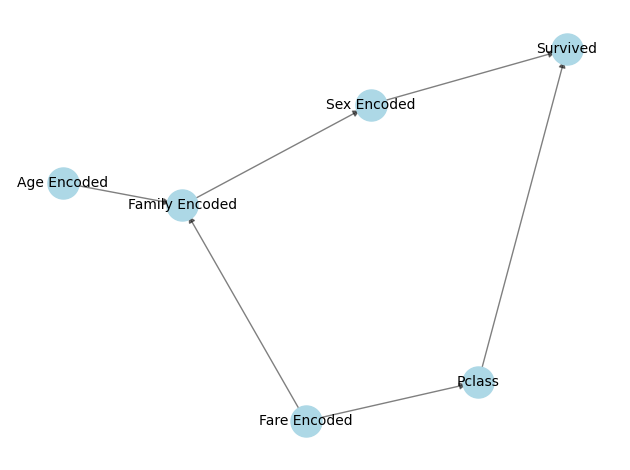

In [28]:

# Creating and visualizing a graph Bayesian Network
model_graph = nx.DiGraph(edges)
pos = nx.spring_layout(model_graph)
nx.draw_networkx_nodes(model_graph, pos, node_size=500, node_color="lightblue")
nx.draw_networkx_edges(model_graph, pos, width=1, alpha=0.5, arrows=True)
nx.draw_networkx_labels(model_graph, pos, font_size=10, font_color="black")

# Displaying the plot
plt.axis("off")
plt.tight_layout()
plt.show()


# A better view of the Bayesian Network
![Alt text](network.png)


# Bayesian Estimation for Conditional Probability Distributions (CPDs)
I used the BayesianEstimator from the pgmpy library to estimate the CPDs for each node in our Bayesian Network model.This estimator uses Bayesian statistics to estimate the CPD of each node. It allows us to incorporate prior knowledge.  

**Steps:**  
**a**. Initialize the BayesianEstimator class with the constructed Bayesian model and the dataset.  
**b**. For each node in the model, we estimate and print its CPD.

In [29]:
from pgmpy.estimators import BayesianEstimator

# Creating an instance of the BayesianEstimator class
estimator = BayesianEstimator(model, df)

# Accessing the CPDs for each variable
for variable in model.nodes:
    cpd = estimator.estimate_cpd(node=variable)
    print(f"CPD for {variable}:")
    print(cpd)


CPD for Pclass:
+--------------+----------------------+---------------------+---------------------+----------------------+
| Fare Encoded | Fare Encoded(0)      | Fare Encoded(1)     | Fare Encoded(2)     | Fare Encoded(3)      |
+--------------+----------------------+---------------------+---------------------+----------------------+
| Pclass(1)    | 0.019026439337781073 | 0.18023133543638276 | 0.798306389530408   | 0.9846390168970816   |
+--------------+----------------------+---------------------+---------------------+----------------------+
| Pclass(2)    | 0.019026439337781073 | 0.4325972660357518  | 0.06851424172440337 | 0.007680491551459295 |
+--------------+----------------------+---------------------+---------------------+----------------------+
| Pclass(3)    | 0.9619471213244379   | 0.38717139852786536 | 0.13317936874518857 | 0.007680491551459295 |
+--------------+----------------------+---------------------+---------------------+----------------------+
CPD for Survived:
+--

# Probabilistic Inference for Survival Probability
In this section, I will perform probabilistic inference to predict the chances of survival for a new passenger using the **VariableElimination** method from the pgmpy library.This method is an exact inference algorithm used to compute the posterior distribution over specified variables given some evidence. It works by systematically reducing the size of the factor graph by eliminating variables.  

We define the evidence for the new passenger based on known attributes: **'Sex Encoded'**, **'Age Encoded'**, **'Fare Encoded'**, and **'Pclass'**.We then use the query method to compute the probability distribution over the **'Survived'** variable based on the evidence and we print the results.

In [30]:
from pgmpy.inference import VariableElimination

# Creating an instance of the VariableElimination class
inference = VariableElimination(model)

# Defining the evidence for the new passenger
evidence = {
    'Sex Encoded': 1,   # Female
    'Age Encoded': 2,  # Teenager
    'Fare Encoded': 1, # Medium Fare
    'Pclass': 1, # First Class
}

# Computing the probability distribution over the 'Survived' variable
prob_survived = inference.query(['Survived'], evidence=evidence)

# Printing the probability distribution for the 'Survived' variable
print(prob_survived)

+-------------+-----------------+
| Survived    |   phi(Survived) |
+=============+=================+
| Survived(0) |          0.0319 |
+-------------+-----------------+
| Survived(1) |          0.9681 |
+-------------+-----------------+



### **Model Evaluation using Log-likelihood, AIC, and BIC**

In this section, I assess the fit of our Bayesian Network model to the dataset by computing three key metrics:

- **Log-likelihood**: This metric indicates the log probability of observing the given data under the proposed model. A higher log-likelihood indicates a model that fits the data better.

- **Akaike Information Criterion (AIC)**: It is a measure that evaluates the goodness of fit while penalizing for the complexity  of the model. A model with a lower AIC is generally considered to be a better fit, given the trade-off between accuracy and complexity.

- **Bayesian Information Criterion (BIC)**: BIC also evaluates the goodness of fit while penalizing for model complexity. However, BIC imposes a stricter penalty compared to AIC, especially for larger datasets. A lower BIC indicates a better model fit considering the model's complexity.

I compared these metrics of different Bayesian Network structures so that I could settle for the one best fitted for this implemenation. I settled for the one whose **Log Likelihood** was closesest to zero. I them used AIC and BIC to solidify this choice.


In [ ]:
from pgmpy.inference import VariableElimination

def compute_log_likelihood(model, data):
    """
    Compute the log-likelihood of the model given the data.
    """
    infer = VariableElimination(model)
    log_likelihood = 0
    for index, row in data.iterrows():
        slice_data = dict(row)
        for node in model.nodes():
            state = slice_data[node]
            local_data = {k: v for k, v in slice_data.items() if k in model.predecessors(node)}
            factor = infer.query([node], local_data)
            state_index = model.get_cpds(node).state_names[node].index(state)  # get the index of the state
            prob = factor.values[state_index]
            log_likelihood += np.log(prob)
    return log_likelihood

log_likelihood = compute_log_likelihood(model, df)

In [ ]:
# Number of parameters in the model
k = sum([len(cpd.get_values().flatten()) - 1 for cpd in model.get_cpds()])

# Number of data points
n = len(df)

# Calculating AIC
aic = 2*k - 2*log_likelihood

# Calculating BIC
bic = k*np.log(n) - 2*log_likelihood

print ("Log Likelyhood:", log_likelihood)
print(f"AIC: {aic}")
print(f"BIC: {bic}")



### **Cross-Validation and Model Evaluation**

In this analysis, I aim to evaluate the performance of a Decision Tree Classifier on predicting survival outcomes in the Titanic dataset. Instead of relying on a single train-test split, I utilize k-fold cross-validation to ensure a robust evaluation.


1. **Feature Selection**: I chose features such as **Pclass**, **Age Encoded**, **Fare Encoded**, **Sex Encoded**, and **Family Encoded** to predict the **Survived** target variable.
2. **K-Fold Cross-Validation Setup**: I split the dataset into 5 distinct folds, ensuring the data is shuffled before creating splits.
3. **Model Training and Evaluation**: For each fold, I trained the Decision Tree Classifier on the training data and then evaluated the model's performance on the test data using accuracy as our metric.
4. **Aggregate Results**: After processing all folds, I computed the mean accuracy to get an overall performance measure of our classifier.

By adopting this cross-validation approach, the aim to get a more generalized and unbiased estimation of our model's capability to predict survival on unseen data.


In [ ]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Defining features and target variable
X = df[['Pclass', 'Age Encoded', 'Fare Encoded','Sex Encoded','Family Encoded']]
y = df['Survived']

# Defining k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

accuracies = []
recalls = []
precisions = []
f1_scores = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Defining and fitting the model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Making predictions and evaluating
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1)

# Printing the mean of all the metrics from the cross-validation
print(f"Mean Accuracy: {sum(accuracies) / len(accuracies)}")
print(f"Mean Recall: {sum(recalls) / len(recalls)}")
print(f"Mean Precision: {sum(precisions) / len(precisions)}")
print(f"Mean F1-score: {sum(f1_scores) / len(f1_scores)}")


### **Conclusion**

**Mean Accuracy: 0.8249 (82.49%):** This metric tells us about the overall performance of the model. 82.49% of all the predictions made by the model were correct. This is a relatively high accuracy, suggesting that the model is performing well in general.

**Mean Recall: 0.6998 (69.98%):** It measures the proportion of actual positives that are correctly identified as such. This means that, of all the positive samples (e.g., passengers that actually survived), the model correctly predicted about 70% of them. 

**Mean Precision: 0.8221 (82.21%):** Precision tells us about the accuracy of positive predictions. Of all the samples the model predicted as positive (e.g., predicted to survive), about 82.21% of them were actually positive.

**Mean F1-score: 0.7537 (75.37%):** The F1-score is the harmonic mean of precision and recall. It provides a balance between the two.

- **Model Evaluation with Bayesian Metrics**:
  - **Log-Likelihood**: The computed log-likelihood of -3620 gives us an understanding of how probable our observed data is under the proposed model. A higher absolute value of log-likelihood indicates that our model could be improved.
  
  - **Akaike Information Criterion (AIC)**: With a value of 7374, the AIC suggests a trade-off between the goodness of fit of the model and its complexity. The AIC value provides us a measure to compare with other models: a lower AIC would indicate a potentially better model when comparing two or more models.
  
  - **Bayesian Information Criterion (BIC)**: The BIC score of 7993.66, like AIC, also penalizes model complexity. A lower BIC indicates a model that is better at predicting the data while being parsimonious.

In summary, classifier performs well in terms of accuracy on the Titanic dataset. However, Bayesian metrics hint at potential areas for improvement, possibly by tweaking the model parameters or considering alternative modeling approaches. 

--------------------------------------------------------------------------------------------- **THE END** -----------------------------------------------------------------------------------------------------